In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  datasets, cross_validation, ensemble
from sklearn.naive_bayes import GaussianNB

In [13]:
# 使用sklearn自带的手写数字
def load_data():
    digits = datasets.load_digits()
    return cross_validation.train_test_split(digits.data,digits.target,test_size=0.25,random_state=0, stratify=digits.target)

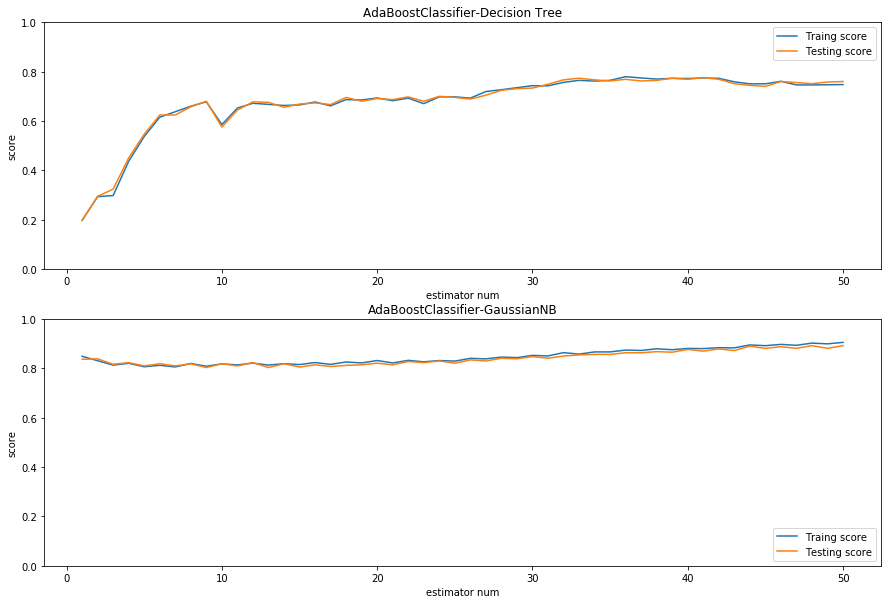

In [18]:
def test_AdaBoostClassifier(*data):
        X_train,X_test,Y_train,Y_test = data
        fig = plt.figure()
        fig.set_figheight(10)
        fig.set_figwidth(15)
        
        ## 默认的分类及 决策树 Decision Tree
        clf = ensemble.AdaBoostClassifier(learning_rate=0.1)
        clf.fit(X_train,Y_train)
        ## 绘图 
        ax = fig.add_subplot(211)
        estimators_num = len(clf.estimators_)
        X = range(1, estimators_num+1)
        ax.plot(list(X), list(clf.staged_score(X_train,Y_train)),label='Traing score')
        ax.plot(list(X), list(clf.staged_score(X_test,Y_test)),label='Testing score')
        ax.set_xlabel('estimator num')
        ax.set_ylabel('score')
        ax.set_ylim(0,1)
        ax.legend(loc='best')
        ax.set_title('AdaBoostClassifier-Decision Tree')
        
        ## 高斯贝叶斯
        clf = ensemble.AdaBoostClassifier(learning_rate=0.1,base_estimator=GaussianNB())
        clf.fit(X_train,Y_train)
        ## 绘图 
        ax = fig.add_subplot(212)
        estimators_num = len(clf.estimators_)
        X = range(1, estimators_num+1)
        ax.plot(list(X), list(clf.staged_score(X_train,Y_train)),label='Traing score')
        ax.plot(list(X), list(clf.staged_score(X_test,Y_test)),label='Testing score')
        ax.set_xlabel('estimator num')
        ax.set_ylabel('score')
        ax.set_ylim(0,1)
        ax.legend(loc='lower right')
        ax.set_title('AdaBoostClassifier-GaussianNB')
        
        
        
        plt.show()

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_AdaBoostClassifier(X_train,X_test,Y_train,Y_test)
        

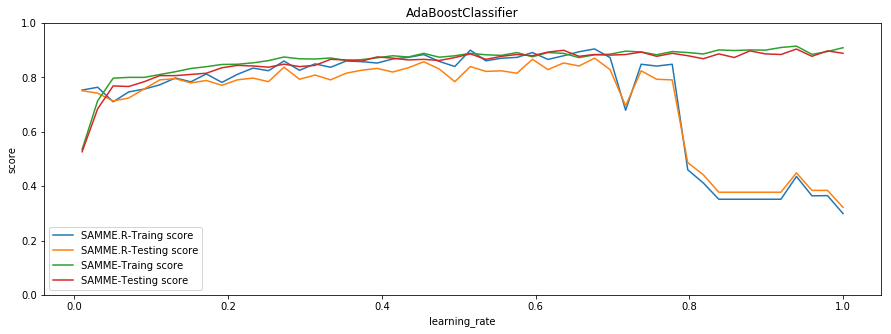

In [25]:
# 考虑学习率(两种算法下)对结果的影响
def test_AdaBoostClassifier_learning_rate(*data):
    X_train,X_test,Y_train,Y_test = data
    learning_rates = np.linspace(0.01,1)
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111)
    algorithms = ('SAMME.R','SAMME')
    for algorithm in algorithms:
        traing_score=[]
        testing_score=[]
        for learning_rate in learning_rates:
            clf = ensemble.AdaBoostClassifier(learning_rate=learning_rate, n_estimators=500, algorithm=algorithm)
            clf.fit(X_train,Y_train)
            traing_score.append(clf.score(X_train,Y_train))
            testing_score.append(clf.score(X_test,Y_test))
        
             ## 绘图 
        ax.plot(learning_rates, traing_score,  label='{0}-Traing score'.format(algorithm))
        ax.plot(learning_rates, testing_score, label='{0}-Testing score'.format(algorithm))
    ax.set_xlabel('learning_rate')
    ax.set_ylabel('score')
    ax.set_ylim(0,1)
    ax.legend(loc='best')
    ax.set_title('AdaBoostClassifier')    
    plt.show()

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_AdaBoostClassifier_learning_rate(X_train,X_test,Y_train,Y_test)
        
        

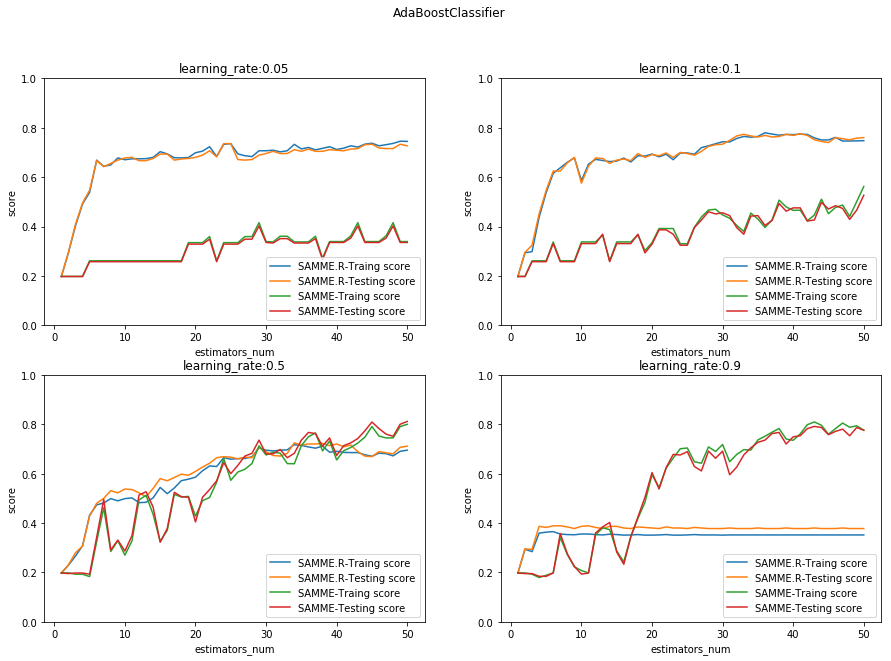

In [30]:
# 考虑算法对结果的影响
def test_AdaBoostClassifier_algorithm(*data):
    X_train,X_test,Y_train,Y_test = data
    learning_rates = (0.05,0.1,0.5,0.9)
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(15)
    algorithms = ('SAMME.R','SAMME')
    for i,learning_rate in enumerate(learning_rates):
        ax = fig.add_subplot(2,2,i+1)
        for algorithm in algorithms:
            traing_score=[]
            testing_score=[]
            clf = ensemble.AdaBoostClassifier(learning_rate=learning_rate, algorithm=algorithm)
            clf.fit(X_train,Y_train)
            estimators_num = len(clf.estimators_)
            X = range(1, estimators_num+1)
            ax.plot(list(X), list(clf.staged_score(X_train,Y_train)),label='{0}-Traing score'.format(algorithm))
            ax.plot(list(X), list(clf.staged_score(X_test,Y_test)),  label='{0}-Testing score'.format(algorithm))
        ax.set_xlabel('estimators_num')
        ax.set_ylabel('score')
        ax.set_ylim(0,1)
        ax.legend(loc='lower right')
        ax.set_title('learning_rate:{0}'.format(learning_rate))    
    fig.suptitle('AdaBoostClassifier')
    plt.show()

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_AdaBoostClassifier_algorithm(X_train,X_test,Y_train,Y_test)